# House Prices

## Get Data

In [1]:
# load libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [2]:
# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
# check data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# columns to be dropped
dropcols = train.isnull().sum().sort_values().tail(11).index
dropcols

Index(['GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'],
      dtype='object')

In [5]:
# features & targets
target = "SalePrice"
not_features = ["Id", "SalePrice"]
all_features = [x for x in train.columns if x not in dropcols and x not in not_features]
cat_features = train[all_features].select_dtypes("object").columns
num_features = train[all_features].select_dtypes("number").columns

len(all_features), len(cat_features), len(num_features)

(68, 34, 34)

## EDA

In [6]:
# check numerical data
train[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [7]:
# check numerical data
train[cat_features].describe().T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


<AxesSubplot:>

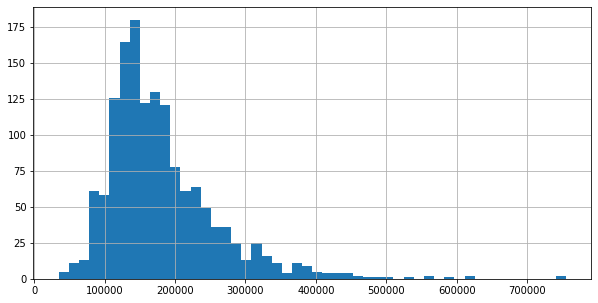

In [8]:
train[target].hist(bins=50, figsize=(10, 5))

## Preprocess Data

In [9]:
# fill in nulls
train[num_features] = train[num_features].fillna(train[num_features].median())
train[cat_features] = train[cat_features].fillna(train[cat_features].mode().iloc[0])

In [10]:
# split into train and validation
xtrain, xtest, ytrain, ytest = train_test_split(
    train[all_features], train[target], test_size=0.20
)

In [11]:
# reset as train and val
train_df = pd.concat([xtrain, ytrain], axis=1)
val_df = pd.concat([xtest, ytest], axis=1)

train_df.shape, val_df.shape

((1168, 69), (292, 69))

In [12]:
# function to create tf dataset
def df_to_dataset(data, target, shuffle=False, repeat=False, batch_size=5, drop_remainder=False):
    df = data.copy()
    labels = df.pop(target)
    data = {key: np.array(value)[:, tf.newaxis] for key, value in df.items()}
    data = dict(data)
    ds = tf.data.Dataset.from_tensor_slices((data, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    if repeat:
        ds = ds.repeat()
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)
    ds = ds.prefetch(batch_size)
    return ds

In [13]:
# create dataset
BATCH_SIZE = 128

train_ds = df_to_dataset(
    data=train_df, 
    target=target,
    shuffle=True,
    repeat=False,
    batch_size=BATCH_SIZE,
    drop_remainder=True
)

val_ds = df_to_dataset(
    data=val_df,
    target=target,
    shuffle=False,
    repeat=False,
    batch_size=BATCH_SIZE,
    drop_remainder=False
)

In [17]:
example = next(iter(train_ds))[0]
input_dtypes = {}
for key in example:
    input_dtypes[key] = example[key].dtype

input_dtypes

{'MSSubClass': tf.int64,
 'MSZoning': tf.string,
 'LotArea': tf.int64,
 'Street': tf.string,
 'LotShape': tf.string,
 'LandContour': tf.string,
 'Utilities': tf.string,
 'LotConfig': tf.string,
 'LandSlope': tf.string,
 'Neighborhood': tf.string,
 'Condition1': tf.string,
 'Condition2': tf.string,
 'BldgType': tf.string,
 'HouseStyle': tf.string,
 'OverallQual': tf.int64,
 'OverallCond': tf.int64,
 'YearBuilt': tf.int64,
 'YearRemodAdd': tf.int64,
 'RoofStyle': tf.string,
 'RoofMatl': tf.string,
 'Exterior1st': tf.string,
 'Exterior2nd': tf.string,
 'MasVnrType': tf.string,
 'MasVnrArea': tf.float64,
 'ExterQual': tf.string,
 'ExterCond': tf.string,
 'Foundation': tf.string,
 'BsmtQual': tf.string,
 'BsmtCond': tf.string,
 'BsmtExposure': tf.string,
 'BsmtFinType1': tf.string,
 'BsmtFinSF1': tf.int64,
 'BsmtFinType2': tf.string,
 'BsmtFinSF2': tf.int64,
 'BsmtUnfSF': tf.int64,
 'TotalBsmtSF': tf.int64,
 'Heating': tf.string,
 'HeatingQC': tf.string,
 'CentralAir': tf.string,
 'Electric

## Create Layers

In [20]:
# function to create layers
def create_proprocessing_model(numerical, categorical, input_dtypes, df):
    
    preprocess_inputs = {}
    for key in numerical:
        preprocess_inputs[key] = tf.keras.layers.Input(shape=(1,), dtype=input_dtypes[key])
    for key in categorical:
        preprocess_inputs[key] = tf.keras.layers.Input(shape=(1,), dtype=input_dtypes[key])
    
    normalize_layers = {}
    for key in numerical:
        normalize_layer = tf.keras.layers.Normalization(mean=df[key].mean(), variance=df[key].var())
        normalize_layers[key] = normalize_layer
    
    lookup_layers = {}
    for key in categorical:
        lookup_layers[key] = tf.keras.layers.StringLookup(vocabulary=df[key].unique(), output_mode='int')
    
    preprocess_outputs = {}
    for key in preprocess_inputs:
        if key in normalize_layers:
            output = normalize_layers[key](preprocess_inputs[key])
            preprocess_outputs[key] = output
        elif key in lookup_layers:
            output = lookup_layers[key](preprocess_inputs[key])
            preprocess_outputs[key] = output
    
    preprocessing_model = tf.keras.Model(preprocess_inputs, preprocess_outputs)
    
    return preprocessing_model, lookup_layers

In [22]:
preprocessing_model, lookup_layers = create_proprocessing_model(
    num_features, cat_features, input_dtypes, train_df
)

In [24]:
train_ds = train_ds.map(lambda x, y: (preprocessing_model(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x,y: (preprocessing_model(x), y), num_parallel_calls=tf.data.AUTOTUNE)

In [25]:
example = next(train_ds.take(1).as_numpy_iterator())[0]
for key in example:
    print(f'{key}, shape: {example[key].shape}, {example[key].dtype}')

MSSubClass, shape: (128, 1), float32
LotArea, shape: (128, 1), float32
OverallQual, shape: (128, 1), float32
OverallCond, shape: (128, 1), float32
YearBuilt, shape: (128, 1), float32
YearRemodAdd, shape: (128, 1), float32
MasVnrArea, shape: (128, 1), float32
BsmtFinSF1, shape: (128, 1), float32
BsmtFinSF2, shape: (128, 1), float32
BsmtUnfSF, shape: (128, 1), float32
TotalBsmtSF, shape: (128, 1), float32
1stFlrSF, shape: (128, 1), float32
2ndFlrSF, shape: (128, 1), float32
LowQualFinSF, shape: (128, 1), float32
GrLivArea, shape: (128, 1), float32
BsmtFullBath, shape: (128, 1), float32
BsmtHalfBath, shape: (128, 1), float32
FullBath, shape: (128, 1), float32
HalfBath, shape: (128, 1), float32
BedroomAbvGr, shape: (128, 1), float32
KitchenAbvGr, shape: (128, 1), float32
TotRmsAbvGrd, shape: (128, 1), float32
Fireplaces, shape: (128, 1), float32
GarageCars, shape: (128, 1), float32
GarageArea, shape: (128, 1), float32
WoodDeckSF, shape: (128, 1), float32
OpenPorchSF, shape: (128, 1), float

In [33]:
def create_training_model(
    numerical,
    categorical,
    input_dtypes,
    df,
    lookup_layers,
    emb_dim=1,
    model_units=[128,],
    dropout_rates=[0.2,]):
    
    model_inputs = {}
    for key in numerical:
        model_inputs[key] = tf.keras.layers.Input(shape=(1,), dtype='float32')
    for key in categorical:
        model_inputs[key] = tf.keras.layers.Input(shape=(1,), dtype='int64')
    
    features = []
    for key in model_inputs:
        if key in numerical:
            features.append(model_inputs[key])
        elif key in categorical:
            embedding = tf.keras.layers.Embedding(
                input_dim=lookup_layers[key].vocabulary_size(),
                output_dim=emb_dim
            )
            encoded_categorical = embedding(model_inputs[key])
            encoded_categorical = tf.squeeze(encoded_categorical, axis=1)
            features.append(encoded_categorical)
        
    x = tf.concat(features, axis=1)
    
    for units, dropout_rate in zip(model_units, dropout_rates):
        feedforward = keras.Sequential([
            tf.keras.layers.Dense(units, use_bias=False),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.ReLU(),
            tf.keras.layers.Dropout(dropout_rate),
        ])
        x = feedforward(x)
        
    final_layer = tf.keras.layers.Dense(units=1, activation=None)
    model_outputs = final_layer(x)
    training_model = tf.keras.Model(inputs=model_inputs, outputs=model_outputs)
    
    return training_model

In [34]:
emb_dim = 3
model_units = [512, 128]
dropout_rates = [0.2, 0.2,]
lr = 1e-3

In [36]:
training_model = create_training_model(
    num_features,
    cat_features,
    input_dtypes,
    train_df,
    lookup_layers,
    emb_dim=emb_dim,
    model_units=model_units, 
    dropout_rates=dropout_rates
)

training_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.mean_squared_error,]
)

training_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_239 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_240 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_241 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 input_242 (InputLayer)         [(None, 1)]          0           []                               
                                                                                            

## Train Model

In [37]:
epochs = 100
batch_size = 128
steps_per_epoch = len(train_df) // batch_size 

In [39]:
history = training_model.fit(
    train_ds,
    epochs=epochs,
    shuffle=True,
    validation_data=val_ds
)

Epoch 1/100
9/9 [==============================] - 4s 97ms/step - loss: 39352266752.0000 - mean_squared_error: 39352266752.0000 - val_loss: 37963493376.0000 - val_mean_squared_error: 37963493376.0000
Epoch 2/100
9/9 [==============================] - 0s 49ms/step - loss: 39386427392.0000 - mean_squared_error: 39386427392.0000 - val_loss: 37962981376.0000 - val_mean_squared_error: 37962981376.0000
Epoch 3/100
9/9 [==============================] - 0s 49ms/step - loss: 39446925312.0000 - mean_squared_error: 39446925312.0000 - val_loss: 37962399744.0000 - val_mean_squared_error: 37962399744.0000
Epoch 4/100
9/9 [==============================] - 0s 52ms/step - loss: 39487070208.0000 - mean_squared_error: 39487070208.0000 - val_loss: 37961863168.0000 - val_mean_squared_error: 37961863168.0000
Epoch 5/100
9/9 [==============================] - 0s 49ms/step - loss: 39460651008.0000 - mean_squared_error: 39460651008.0000 - val_loss: 37961412608.0000 - val_mean_squared_error: 37961412608.0000


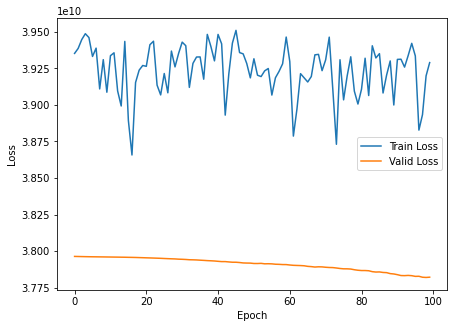

In [40]:
def plot_history(hist, title=None, valid=True):
    plt.figure(figsize=(7, 5))
    plt.plot(np.array(hist.index), hist['loss'], label='Train Loss')
    if valid:
        plt.plot(np.array(hist.index), hist['val_loss'], label='Valid Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.show()
    
hist = pd.DataFrame(history.history)
plot_history(hist)

## Get Embedding Layer

In [68]:
pd.DataFrame(training_model.get_weights()[2]).T

,0,1,2,3,4
0,-0.010737,0.125184,-0.128891,-0.129926,-0.056994
1,0.039767,0.124121,-0.137165,-0.049408,-0.013269
2,-0.027851,0.102008,-0.107232,-0.161919,0.115904


In [67]:
train_df["LotShape"].unique()

array(['Reg', 'IR2', 'IR1', 'IR3'], dtype=object)

In [58]:
train_df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
329,70,RM,6402,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,...,137,0,0,0,0,7,2009,WD,Normal,78000
1180,60,RL,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,Timber,...,0,0,0,0,0,4,2006,WD,Normal,250000
499,20,RL,7535,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,0,480,6,2007,WD,Normal,120000
739,60,RL,9313,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,4,2009,WD,Normal,190000
1148,50,RM,5700,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,176,0,0,0,0,8,2008,WD,Normal,116900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,20,RL,14585,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,...,0,0,0,0,0,6,2007,WD,Normal,181900
220,20,RL,8990,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,4,2006,New,Partial,204900
483,120,RM,4500,Pave,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,...,0,0,0,0,0,5,2006,WD,Normal,164000
116,20,RL,11616,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,144,0,0,0,0,9,2009,WD,Normal,139000
